In [3]:
%load_ext autoreload
%autoreload 2

In [360]:
import xarray as xr
import uxarray as ux
import numpy as np

from numba_celltree import CellTree2d

import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.collections import LineCollection


from matplotlib.collections import PolyCollection

In [361]:
from helpers import ugrid_to_polygon_coords, close_polygons, minmax_Longitude_rad

# Toy Data

In [362]:
grid_xr = xr.open_dataset("data/outCSne8.nc")
data_xr = xr.open_dataset("data/v1.nc")

In [363]:
grid_xr

<xarray.Dataset>
Dimensions:          (grid_size: 384, grid_corners: 4, grid_rank: 1)
Dimensions without coordinates: grid_size, grid_corners, grid_rank
Data variables:
    grid_area        (grid_size) float64 ...
    grid_center_lat  (grid_size) float64 ...
    grid_center_lon  (grid_size) float64 ...
    grid_corner_lat  (grid_size, grid_corners) float64 ...
    grid_corner_lon  (grid_size, grid_corners) float64 ...
    grid_imask       (grid_size) int32 ...
    grid_dims        (grid_rank) int32 ...
Attributes:
    api_version:               5.0
    version:                   5.0
    floating_point_word_size:  8
    file_size:                 0

In [438]:
ugrid = ux.Grid(grid_xr)
face_nodes = ugrid.Mesh2_face_nodes.values
node_x = ugrid.Mesh2_node_x.values
node_y = ugrid.Mesh2_node_y.values

# Datashader

In [439]:
polygon_x, polygon_y = ugrid_to_polygon_coords( \
                                                node_x, \
                                                node_y, \
                                                face_nodes
)

polygon_z = np.random.randint(-1, 2, len(polygon_x))

In [440]:
face_nodes_pad = close_polygons(face_nodes)

In [496]:
idx = face_nodes_pad.ravel()

In [500]:
node_coords = []

In [501]:
node_coords.extend((node_x, node_y))

2

In [503]:
vertices = node_coords[idx]
#vertices = vertices.reshape(vertices.shape[1] * vertices.shape[2], vertices.shape[0])
#faces = ugrid.Mesh2_face_nodes.values
vertices.shape

TypeError: only integer scalar arrays can be converted to a scalar index

In [469]:
vertices.shape

(1920, 2)

In [471]:
poly = PolyCollection(vertices, closed=False)

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2,).

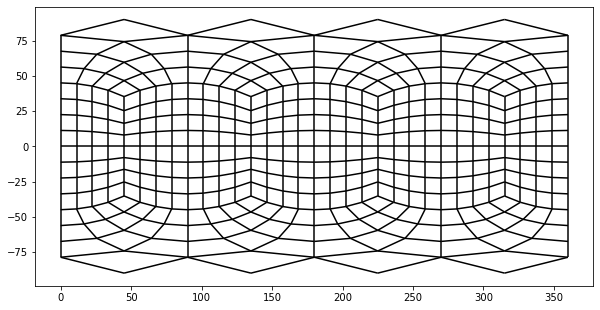

In [370]:
edges = demo.edges(faces, -1)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
demo.plot_edges(ugrid.Mesh2_node_x.values, ugrid.Mesh2_node_y.values, edges, ax, color="black")
#fig.add_artist(lines.Line2D([-180, -90], [-180, 90]))